In [41]:
include("./MDSim.jl")
include("./MakieUtils.jl")
using  LinearAlgebra, Statistics, GLMakie, Plots

In [2]:
MDSimObj = MDSim.Init(100, 30, 0.01, 3.0)
;

In [3]:
# pos_list, vel_list, L_num, KU_list = MDSim.nsteps!(MDSimObj, s -> MDSim.force_brownian_repulsive(s, 1.0, 2.0, 0.01), 10000)
pos_list, vel_list, L_num, KU_list, PT_list = MDSim.nsteps!(MDSimObj, s -> MDSim.force_lenard_jones(s, 5.0), 10000)
;

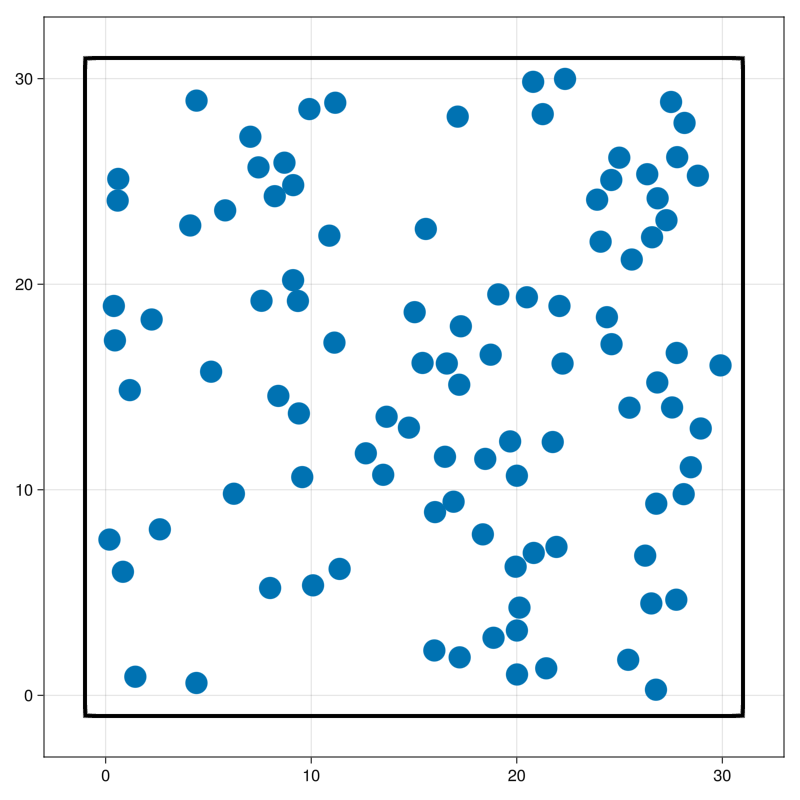

In [5]:
CMplot.ShowSystem(MDSimObj, 800)

In [75]:
CMplot.AnimateSystem(MDSimObj, pos_list, "anim(N=100-v=3.0)"; fps = 30)

"results/anim/anim(N=100-v=3.0).mp4"

In [76]:
CMplot.AnimateSystem(MDSimObj, pos_list[:, :, :], "anim-trace(N=100-v=3.0)"; fps = 30, show_trace = true)

"results/anim/anim-trace(N=100-v=3.0).mp4"

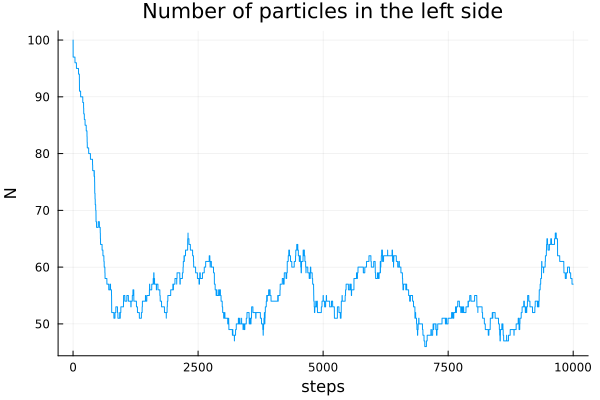

In [9]:
Plots.plot(L_num, title = "Number of particles in the left side", xlabel= "steps", ylabel = "N", legend = false)

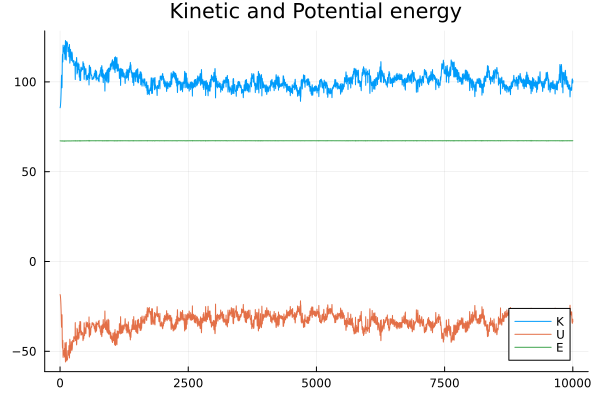

In [10]:

Plots.plot(KU_list[1, :], title = "Kinetic and Potential energy", label = "K", xlabel = "Steps", ylabel)
Plots.plot!(KU_list[2, :], label = "U")
Plots.plot!(KU_list[1, :]+KU_list[2, :] , label = "E")


In [42]:
auto_cors = zeros(10000÷2 + 1)

for lag = 0:10000÷2
    auto_cors[lag+1] = MDSim.calc_auto_cor(vel_list, lag)
end

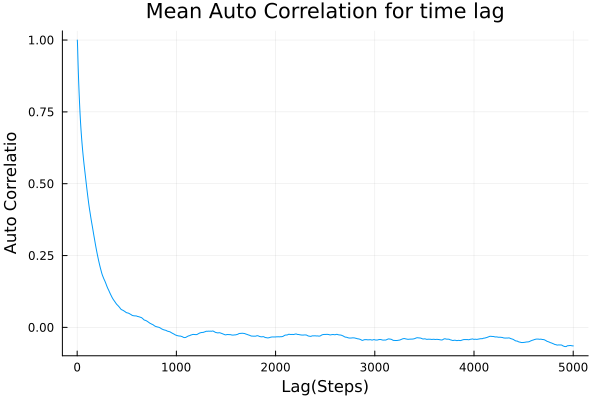

In [45]:
Plots.plot(auto_cors[:], title = "Mean Auto Correlation for time lag", xlabel = "Lag(Steps)", ylabel = "Auto Correlatio", legend = false)

## Van der Waals Equation

In [58]:
Ps = zeros(20)
Ts = zeros(20)

steps = 10000       # Algorithm steps
eq_step = 2500      # Steps for equilibrium


for i = 1:20
    v₀ = i*(3/20) + 2
    MDSimObj = MDSim.Init(100, 30, 0.01, v₀)
    pos_list, vel_list, L_num, KU_list, PT_list = MDSim.nsteps!(MDSimObj, s -> MDSim.force_lenard_jones(s, 5.0), steps)

    Ps[i] = mean(PT_list[1, eq_step:end])
    Ts[i] = mean(PT_list[2, eq_step:end])
    
end
    


In [65]:
A = [ones(20) Ts]
line_fit = A \ Ps

p2_err = sqrt(sum((A*line_fit - Ps).^2) / (18*20*var(Ts)))
p1_err = p2_err * sqrt(sum(Ts.^2)/20)


println("slope = ", line_fit[2], " ± ", p2_err)
println("intercept = ", line_fit[1], " ± ", p1_err)

slope = 0.11348479253538558 ± 0.0014964961715932354
intercept = -0.0031105028601020965 ± 0.002007525946032416


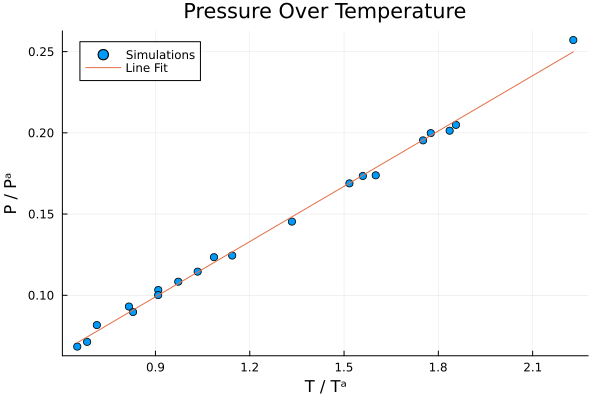

In [62]:
Plots.scatter(Ts, Ps, seriestype = :scatter, ls = :solid, label = "Simulations")
Plots.plot!(t -> line_fit[1] + line_fit[2]*t, label = "Line Fit")
Plots.plot!(title="Pressure Over Temperature", xlabel = "T / Tᵃ", ylabel = "P / Pᵃ")

## Phase Transition

In [47]:
Ps = zeros(20)
Ts = zeros(20)
v₀ = 3
steps = 10000       # Algorithm steps
eq_step = 2500      # Steps for equilibrium

pos_trans = zeros((2, 100, 20*steps))
MDSimObj = MDSim.Init(100, 30, 0.01, v₀)


for i = 1:20
    
    pos_list, vel_list, L_num, KU_list, PT_list = MDSim.nsteps!(MDSimObj, s -> MDSim.force_lenard_jones(s, 5.0), steps)
    pos_trans[:, :, ((i-1)*steps+1):i*steps] = pos_list
    Ps[i] = mean(PT_list[1, eq_step:end])
    Ts[i] = mean(PT_list[2, eq_step:end])
    MDSimObj.vel = MDSimObj.vel .* 0.8 
    
end
    

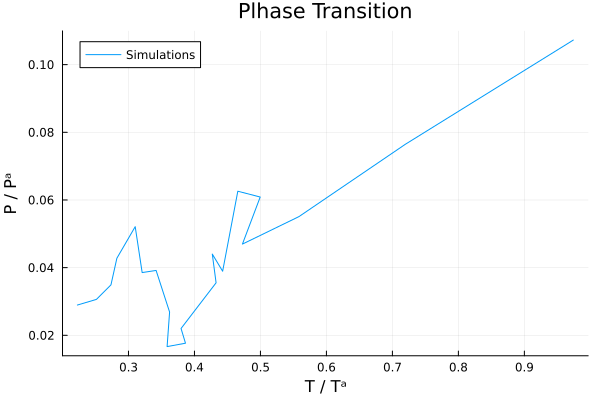

In [51]:
Plots.plot(Ts, Ps, label = "Simulations")
Plots.plot!(title="Pاhase Transition", xlabel = "T / Tᵃ", ylabel = "P / Pᵃ")

In [68]:
CMplot.AnimateSystem(MDSimObj, pos_trans[:, :, 1:100:end], "anim(phase)"; fps = 30)

"results/anim/anim(phase).mp4"